# Apprentissage supervisé

Régression linéaire simple

__Objectif__
- chargement d un jeu de données CSV,
- représentation des données,
- calcul $B_0$ et $B_1$, méthode simple,
- calcul de la qualité du modèle,
- calcul avec la méthode du gradient.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

## Chargement du jeu données "../data/Advertising.csv" 
conserver les colonnes TV et Sales

In [3]:
df = pd.read_csv("../data/Advertising.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
listcol=df.columns

In [6]:
df.drop(columns=[listcol[0],listcol[2],listcol[3]],inplace=True)

In [7]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df.columns[1]

'Sales'

---
Exercice : charger les données de la colonne TV dans un numpy X et Sales dans un. numpy Y

In [10]:
X=df['TV'].values

In [11]:
Y=df['Sales'].values

# Représentation

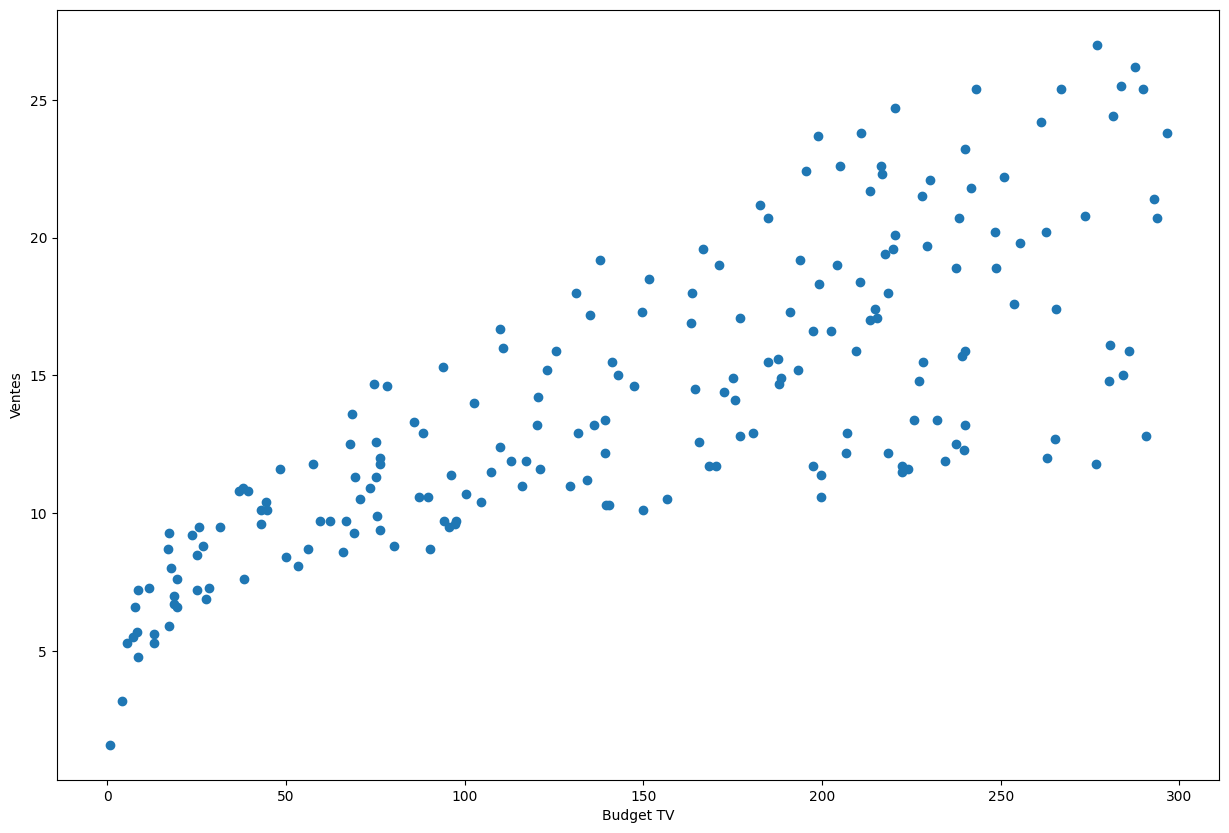

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.xlabel("Budget TV")
plt.ylabel("Ventes")
plt.show()

---
Exercice : Calcul de b1 et b0

![b1b0](static/b0-b1.png)

In [15]:
moy_X=np.mean(X)
moy_Y=np.mean(Y)

In [16]:
moy_X

147.0425

In [17]:
b1=np.sum(((X-moy_X)*(Y-moy_Y)))/np.sum(np.square(X-moy_X))

In [18]:
b1

0.047536640433019736

In [19]:
b0=moy_Y-b1*moy_X

In [20]:
b0

7.0325935491276965

---
Exercice : représenter le jeu de données et le modèle obtenu

In [21]:
x0=0
y0=b0
x1=np.max(X)
y1=b1*x1+b0

In [22]:
print(x0,y0,x1,y1)

0 7.0325935491276965 296.4 21.122453773474746


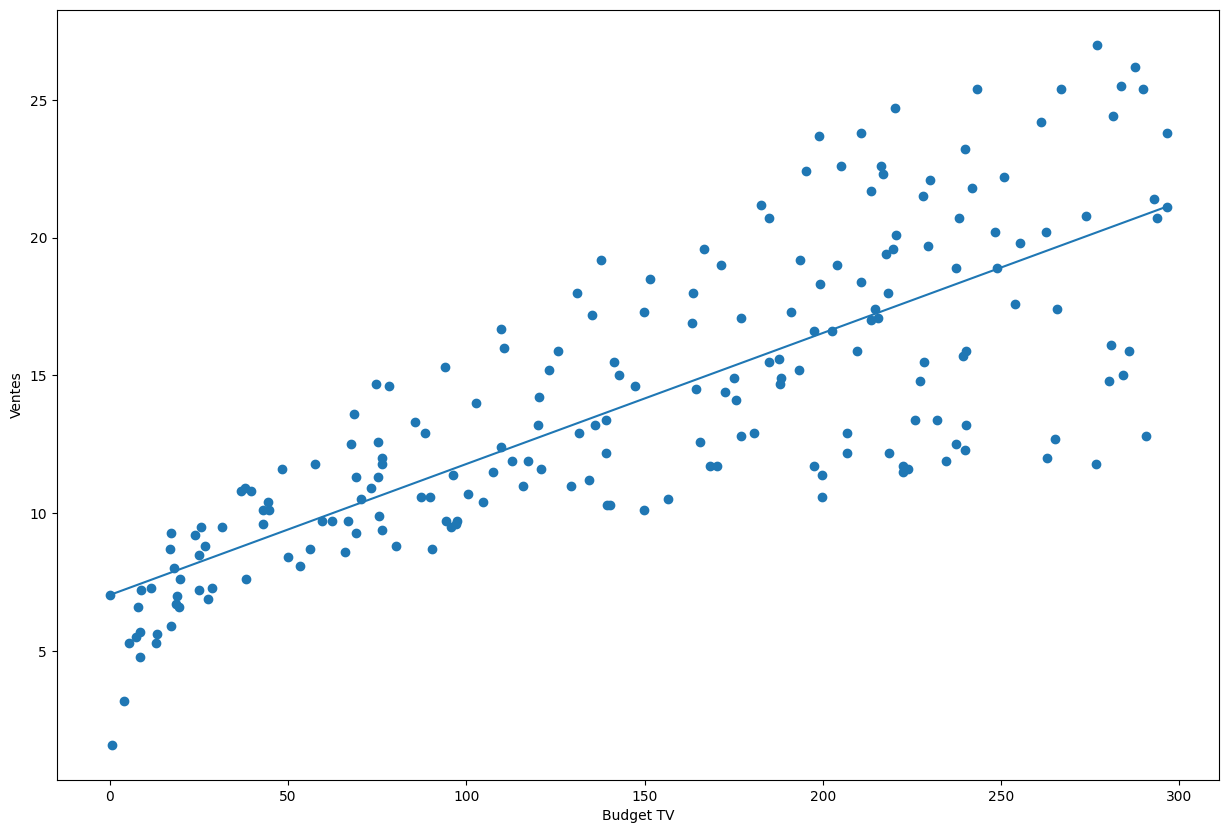

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.xlabel("Budget TV")
plt.ylabel("Ventes")
plt.plot([x0,x1],[y0,y1],marker="o")
plt.show()

## Interprétation de b0 et b1

---
Exercice : calcul de la qualité de notre modèle

RSE = residual standard error

![RSE](static/rse.png)

In [24]:
Y_pred=b1*X+b0

In [25]:
RSE=np.sqrt(1/(len(X)-2)*np.sum(np.square(Y-Y_pred)))

In [26]:
print(RSE)

3.2586563686504624


Votre résultat devrait être proche de 3.25

## Interprétation du RSE

In [27]:
print(f"Erreur de {np.round(RSE/np.mean(Y),2)*100} %")

Erreur de 23.0 %


---
Exercice : Calcul du R2

![R2](static/R2.png)

avec $$TSS = \sum (y - \overline{y})^2$$ 
$$RSS = \sum(ytrue-ypred)^2$$

In [28]:
RSS=np.sum(np.square(Y-Y_pred))

In [29]:
R2=1-(RSS/(np.sum(np.square(Y-moy_Y))))

In [30]:
R2

0.611875050850071

Votre résultat devrait être prochede 0.611

Comment interprétez vous ce score ?

---
# Méthode du gradient

Exercice : définir la fonction permettant d'estimer y en fonction de x, $\theta_0$ et $\theta_1$ 

In [32]:
def reg(x,theta_0, theta_1):
    # Votre code 1 ligne
    y=x*theta_1+theta_0
    return y

In [33]:
assert reg(1,2,2)==4

___
Exercice : définir la fonction de coût MSE=$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

In [34]:
def cost_function(x,y,theta_0,theta_1):
    m=len(x)
    sum_sq_error=np.sum((reg(x,theta_0,theta_1)-y)**2)
    MSE=(1/(2*m))*sum_sq_error
    return MSE
    

In [35]:
assert cost_function(np.array([1,1]),np.array([8,8]),2,2) == 8

---
Exercice : convertir X et Y tableau numpy

In [36]:
X=np.array(X)
Y=np.array(Y)

In [37]:
X[:5]

array([230.1,  44.5,  17.2, 151.5, 180.8])

In [38]:
Y[:5]

array([22.1, 10.4,  9.3, 18.5, 12.9])

---
Recherche de $\theta_0$ et $\theta_1$

Exercice : appliquer l'algorithme du gradient sur un nombre d'itération qui vous parait pertinent.

$
Répéter pendant n_iterations
\{\\
\theta_{0}:= \theta_{0} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\\
\theta_{1}:= \theta_{1} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\times x^{(i)}
\\
\}
$

In [40]:
# hyperparamètres
lr=0.001
iterations=30000

# paramètres
theta_0=0
theta_1=0

# autres paramètres / variables
m=len(X)
Xstd=X/100
histo_theta_0=[]
histo_theta_1=[]
histo_loss=[]

In [41]:
for i in tqdm.tqdm(range(iterations),ncols=60):
    save_theta_0=theta_0
    save_theta_1=theta_1
    
    y_pred=reg(Xstd,save_theta_0,save_theta_1)
    theta_0 = save_theta_0 - lr * (1/m) * np.sum(y_pred - Y)
    theta_1 = save_theta_1 - lr * (1/m) * np.sum((y_pred - Y) * Xstd)

    histo_theta_0.append(theta_0)
    histo_theta_1.append(theta_1)
    
    if i%100==0:
        histo_loss.append(cost_function(Xstd,Y,theta_0,theta_1))

print(f"theta0={theta_0}, theta1={theta_1}") 


100%|█████████████| 30000/30000 [00:00<00:00, 156848.79it/s]

theta0=7.023687285127659, theta1=4.758519464872395


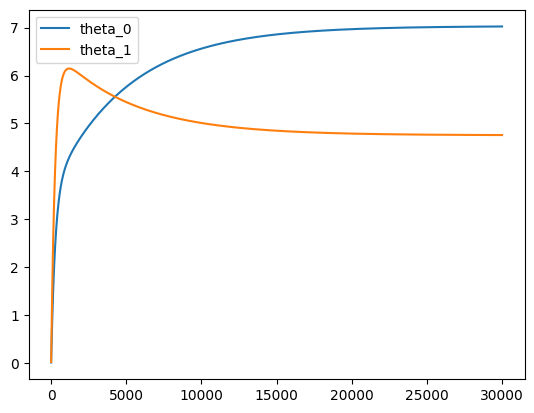

In [42]:
plt.figure()
plt.plot(histo_theta_0,label="theta_0")
plt.plot(histo_theta_1,label="theta_1")
plt.legend()
plt.show()

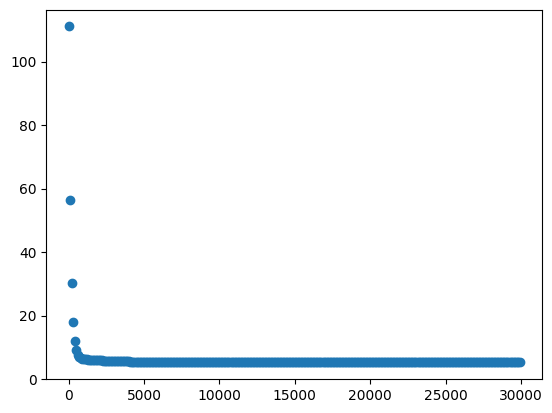

In [43]:
plt.figure()
plt.scatter(np.arange(stop=30000,step=100),histo_loss)
plt.show()

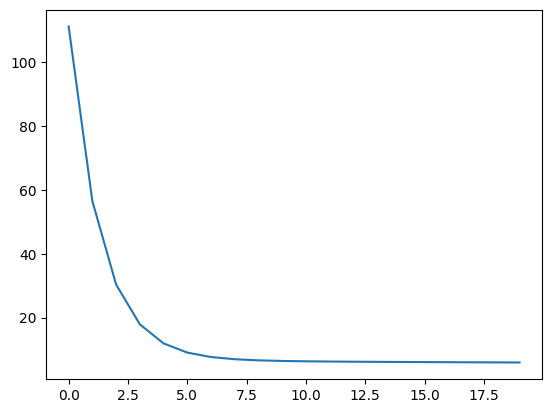

In [46]:
plt.figure()
plt.plot(histo_loss[:20])
plt.show()